In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
from sklearn import preprocessing
import wfdb
import copy as cp
import scipy.signal as signal
from scipy import stats
from sklearn import preprocessing
from tqdm import tqdm
import os
import re
import pandas as pd
import pickle
import csv
import statistics

In [2]:
rlist = []
records = os.path.normpath('mit-bih-dataframes/subject_list.csv')
with open(records) as rfile:
    recordreader = csv.reader(rfile, delimiter=' ', quotechar='|')
    for row in recordreader:
        rlist.append(row[0])

In [3]:
subject_rr_rhythms = []
for x in tqdm(rlist):
    subject_rr_rhythms.append(pd.read_csv(os.path.normpath('mit-bih-extracted/'+x+'_rr_rhythms.csv'), index_col=0))

100%|███████████████████████████████████████████| 23/23 [00:02<00:00, 11.17it/s]


In [4]:
subject_drmean_variances = []
for x in tqdm(rlist):
    subject_drmean_variances.append(pd.read_csv(os.path.normpath('mit-bih-extracted/'+x+'_drmean_variance.csv'), index_col=0))

100%|██████████████████████████████████████████| 23/23 [00:00<00:00, 133.48it/s]


In [17]:
def plot_histogram(dataframe, selection, nrows, ncols):
    plt.figure(figsize=(28, 36))

    for idx, x in tqdm(enumerate(selection)):
        ax = plt.subplot(nrows, ncols, idx + 1)
        ax.set_title('Subject '+str(x), fontsize=28)
        ax.set_xlabel('DRmean variance', fontsize=24)
        ax.set_ylabel('Frequency', fontsize=24)
        ax.tick_params(labelsize=22)

        df = dataframe[x-1]

        normal_data = df.loc[df['rhythm']=='N']['variance']
        afib_data = df.loc[df['rhythm']=='A']['variance']
        other_data = df.loc[df['rhythm']=='O']['variance']
        ax.hist([normal_data, afib_data, other_data], stacked=True, color=['darkcyan', 'orange', 'salmon'])

    plt.suptitle('DRmean variance classified by frequency', fontsize=34, y=0.993)

    normal_patch = mpatches.Patch(color='darkcyan', label='Normal')
    afib_patch = mpatches.Patch(color='orange', label='Afib')
    other_patch = mpatches.Patch(color='salmon', label='Other')
    plt.figlegend([normal_patch, afib_patch, other_patch], 
                ['Normal', 'Afib', 'Other'],
                fontsize=28, 
                loc = "upper right",
                shadow = True)
    plt.tight_layout()

23it [00:01, 14.05it/s]


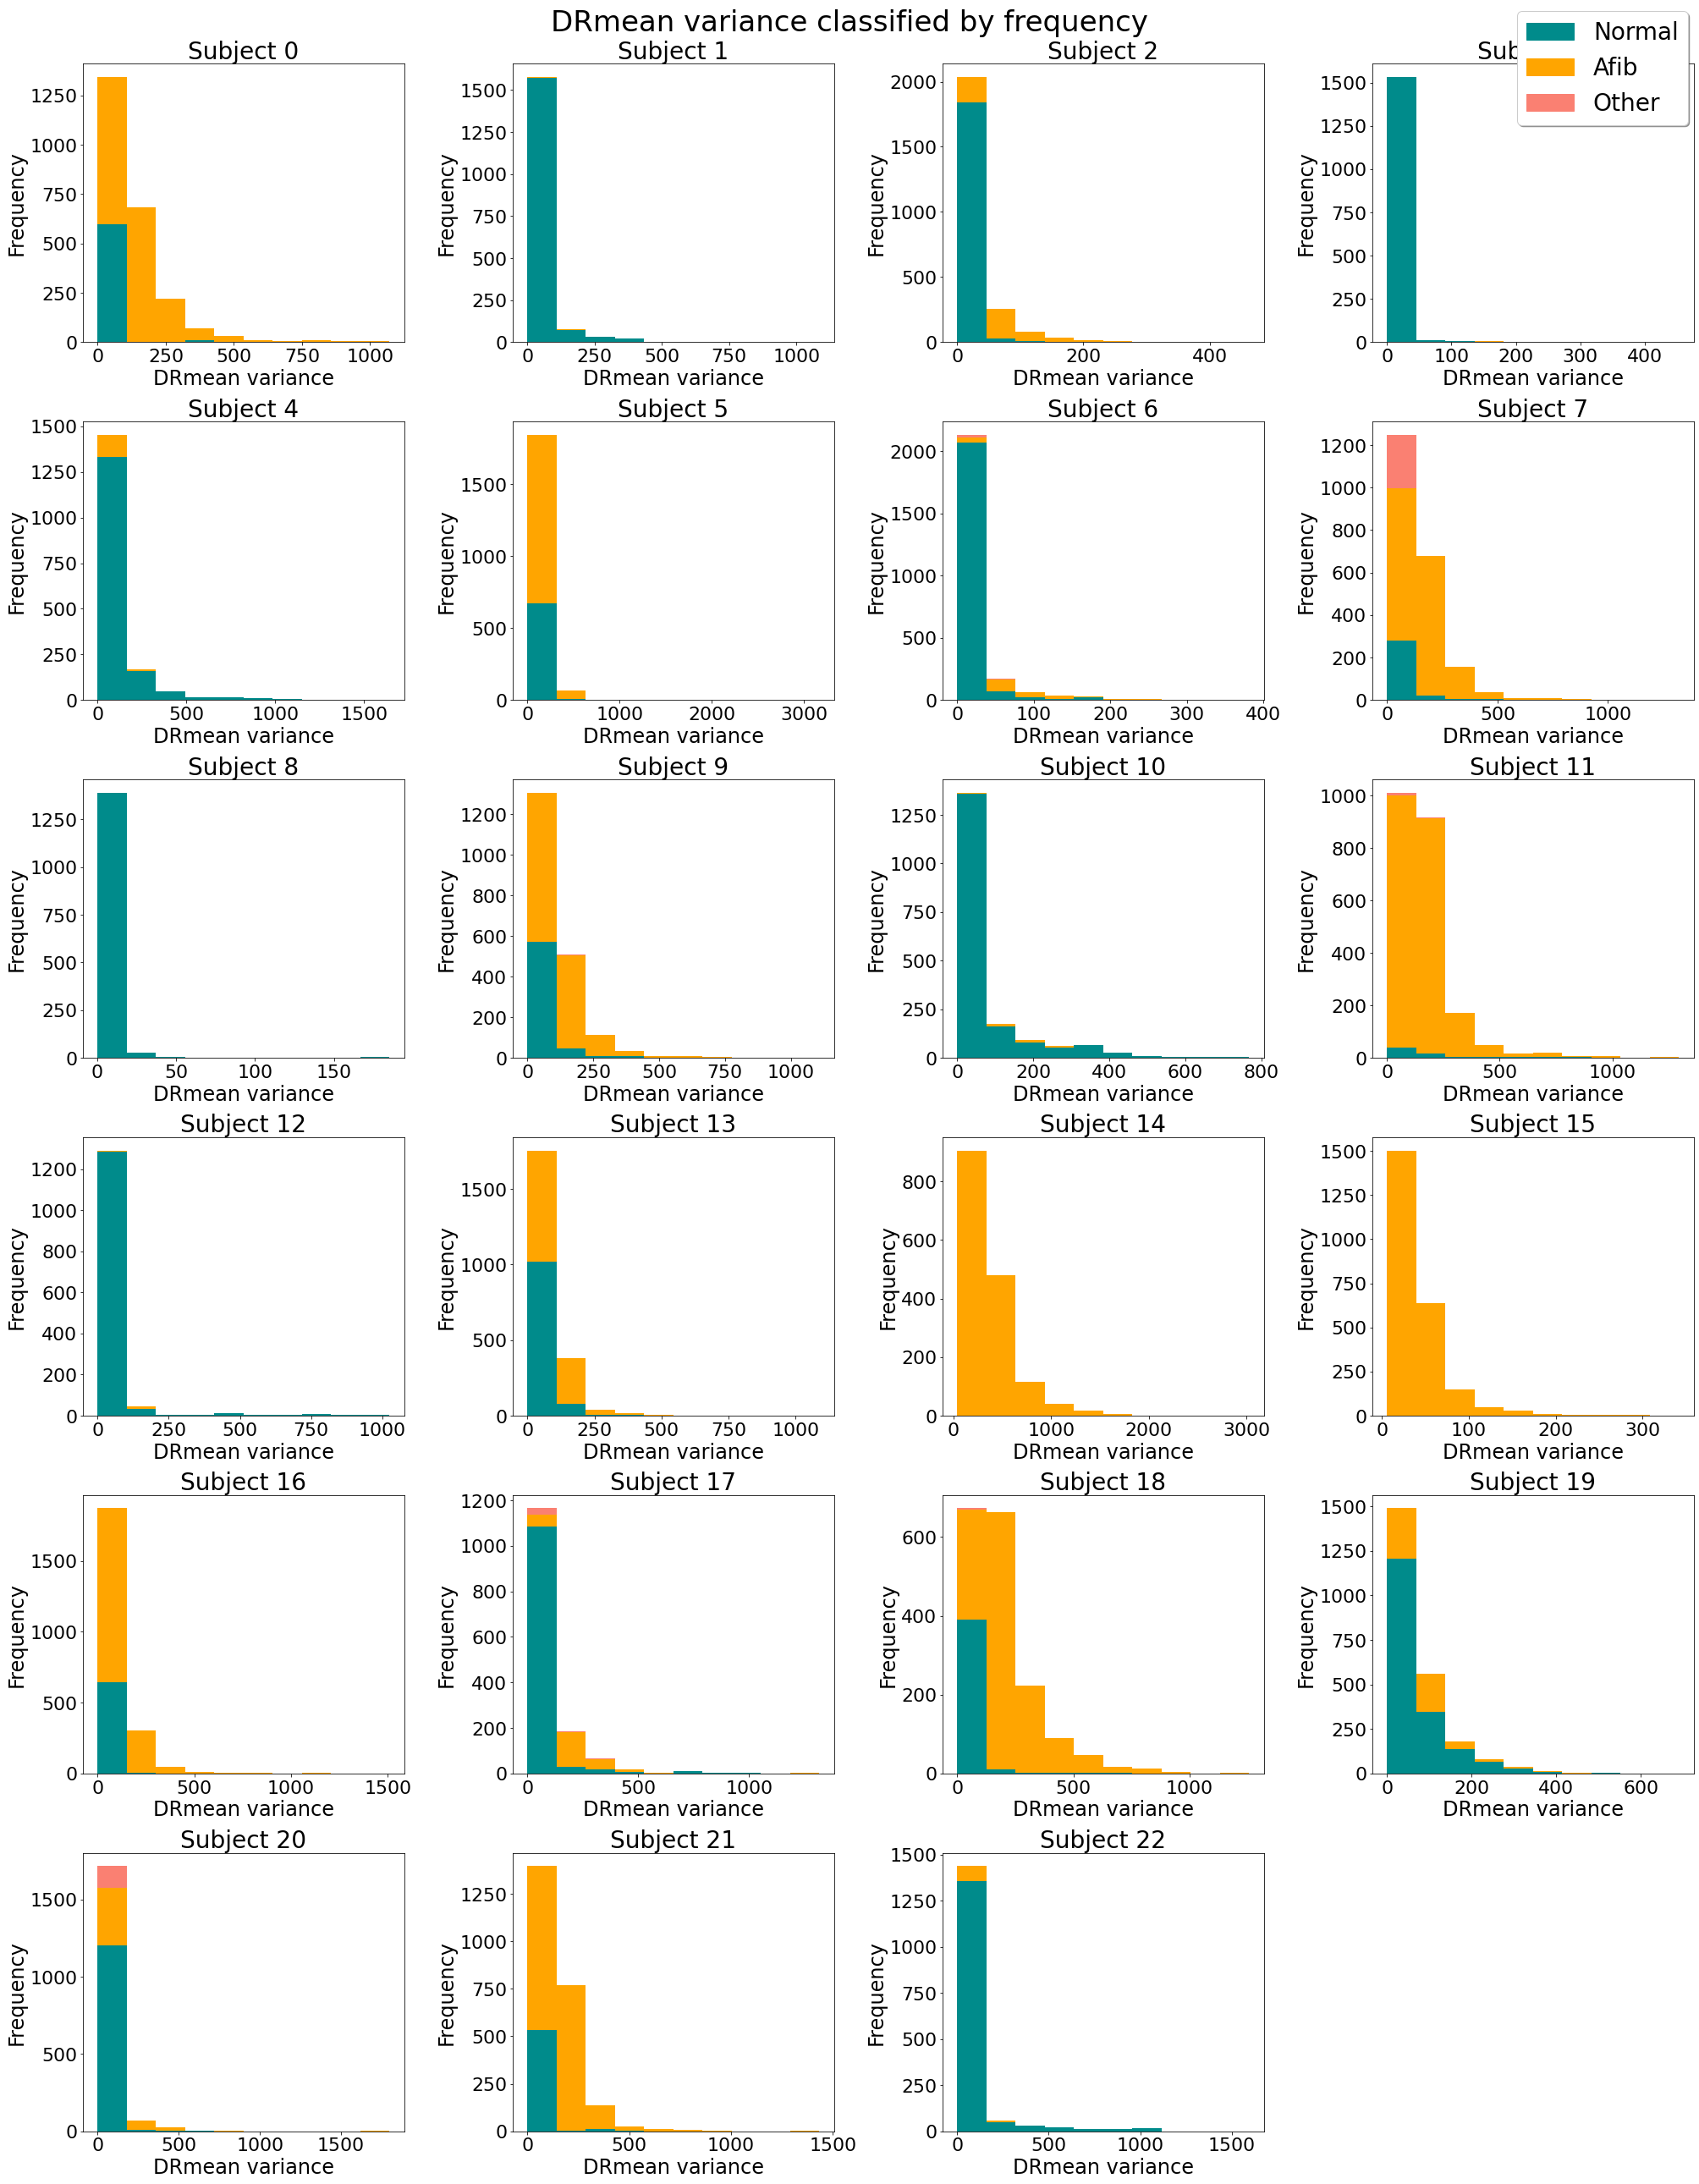

In [18]:
plot_histogram(subject_drmean_variances, list(range(len(subject_drmean_variances))), 6, 4)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f77caf21f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f77c7343490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f77caf21c40>,
 'medians': [<matplotlib.lines.Line2D at 0x7f77c7343970>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f77c7343c40>,
 'means': []}

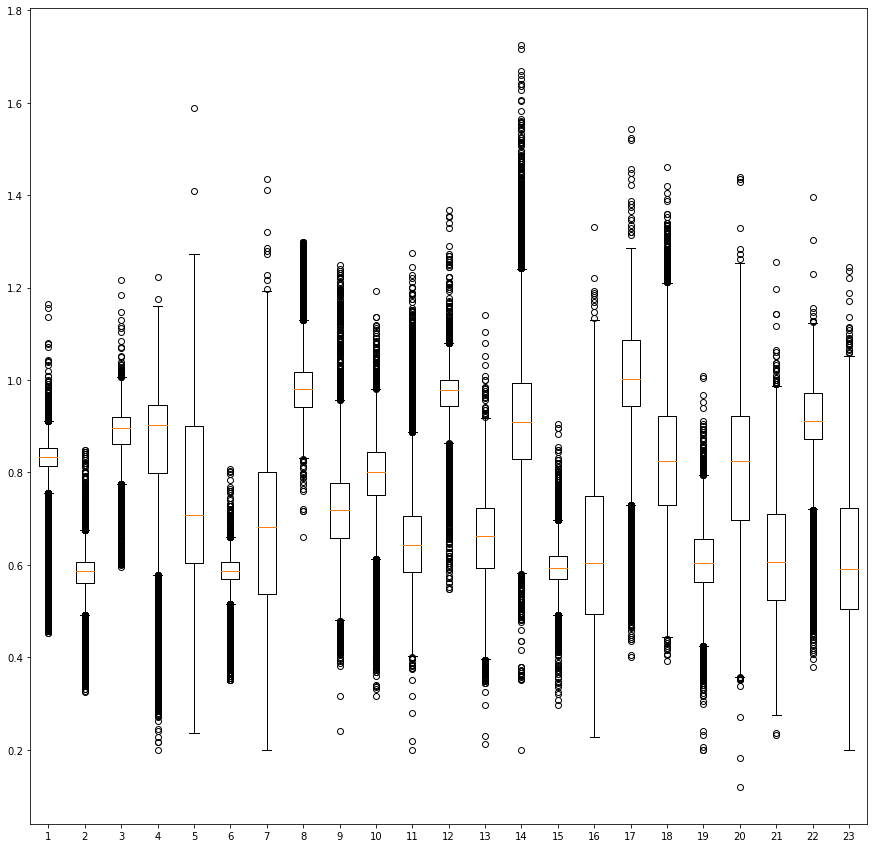

In [7]:
plt.figure(figsize=(15, 15))
plt.boxplot([df['rmean_seconds'] for df in subject_rr_rhythms])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f77c95cc100>,
 'caps': [<matplotlib.lines.Line2D at 0x7f77c95e3460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f77c95cc400>,
 'medians': [<matplotlib.lines.Line2D at 0x7f77c95e3160>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f77c95e3ac0>,
 'means': []}

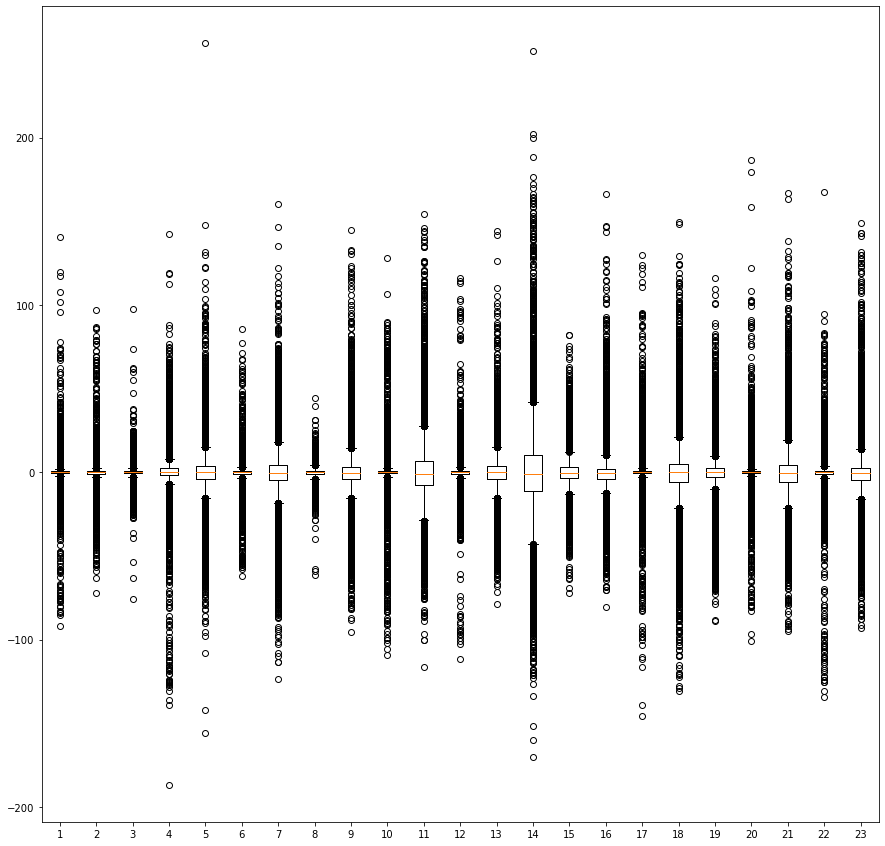

In [8]:
plt.figure(figsize=(15, 15))
plt.boxplot([df['drmean'] for df in subject_rr_rhythms])